In [24]:
import numpy as np
import sys, os, git
from matplotlib import pyplot as plt

In [25]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(git_path + "/pyplot-perso/")
from functions import complete_panel, save_figure, set_boundaries, \
                      add_subplotlabels, set_boundaries, prepare_figure
from color_series1 import colors
path_figures = current_path[len(git_path):] + '/'

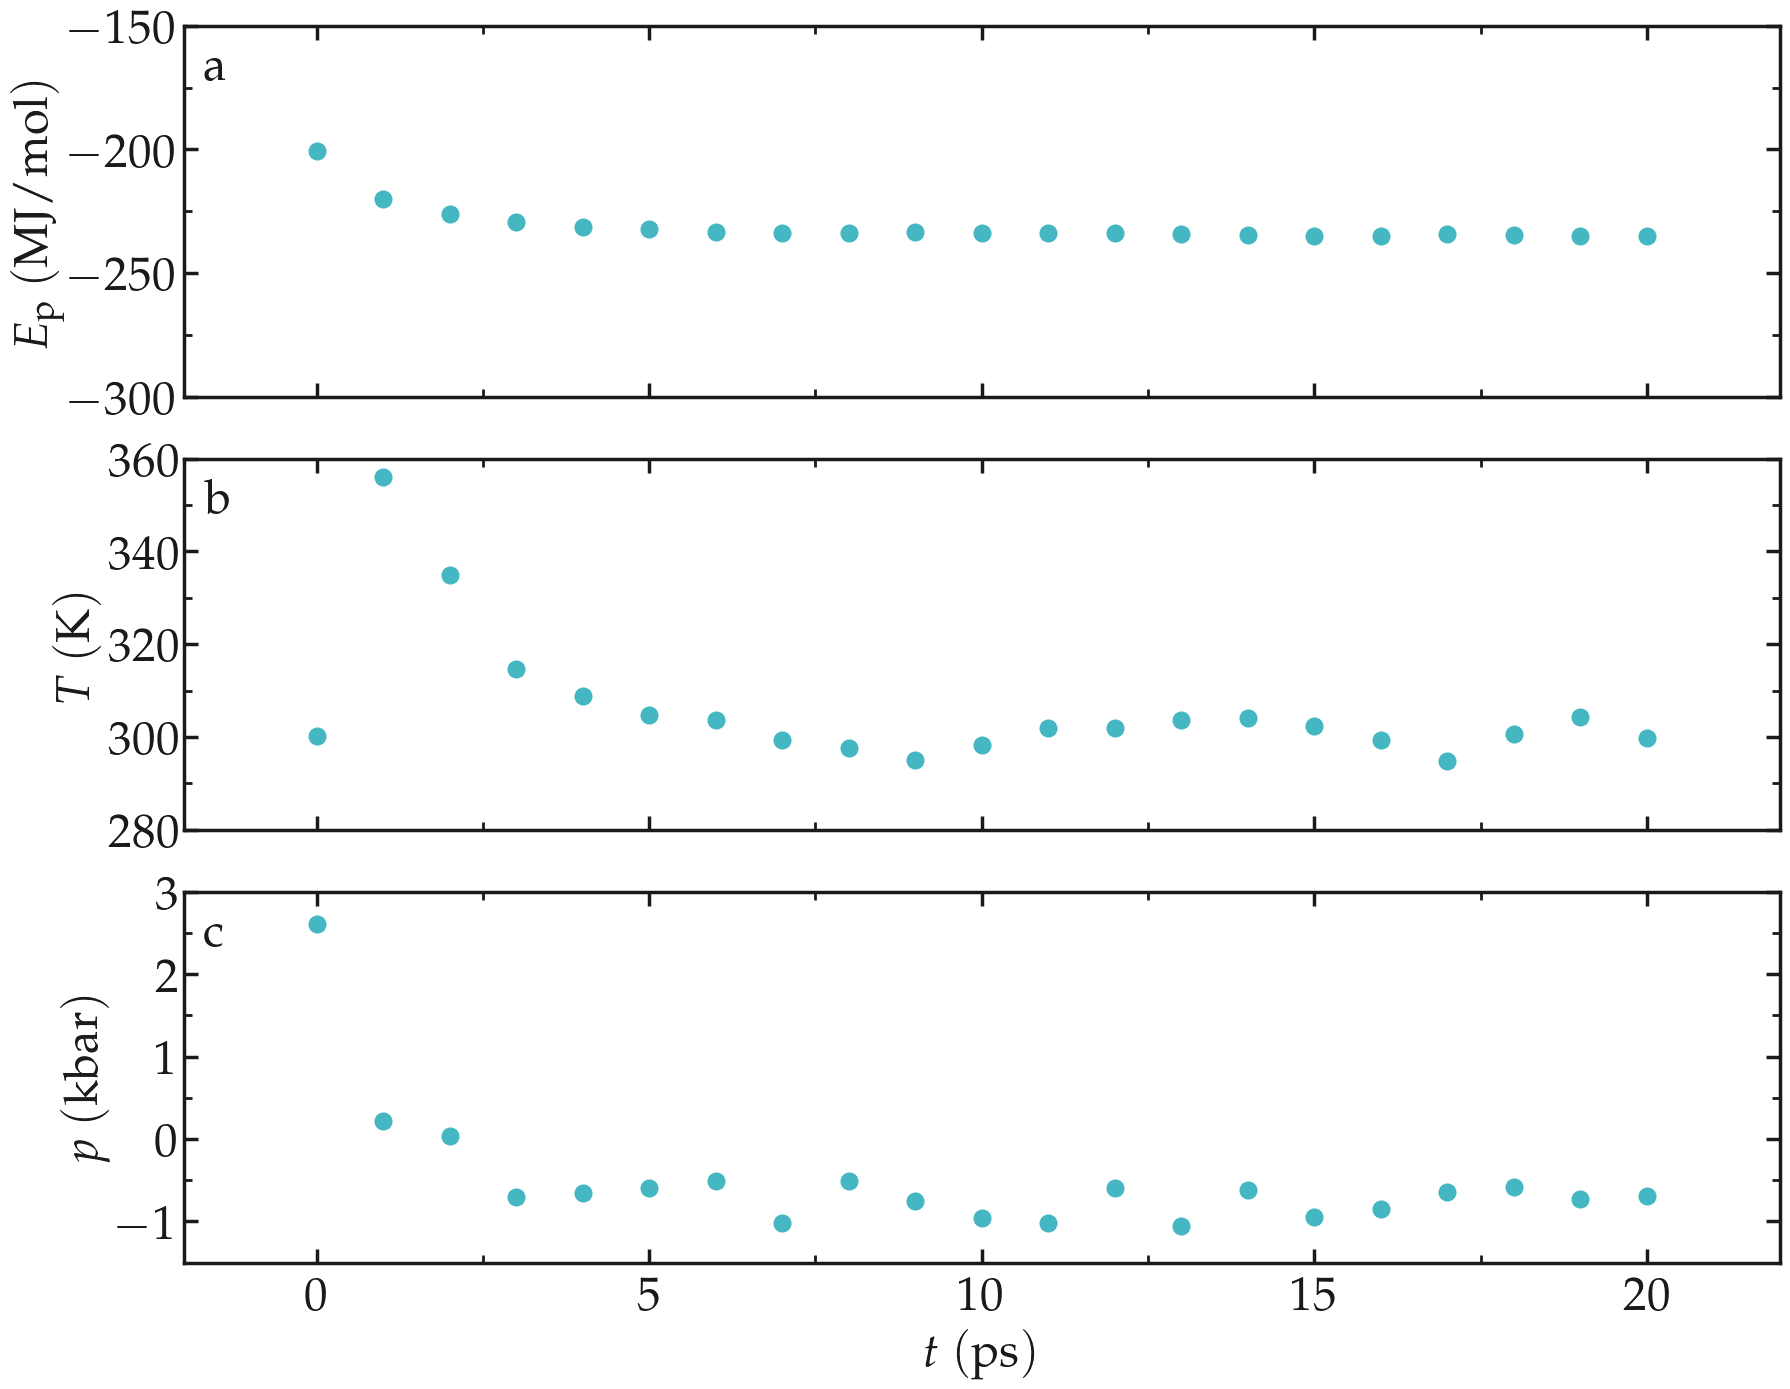

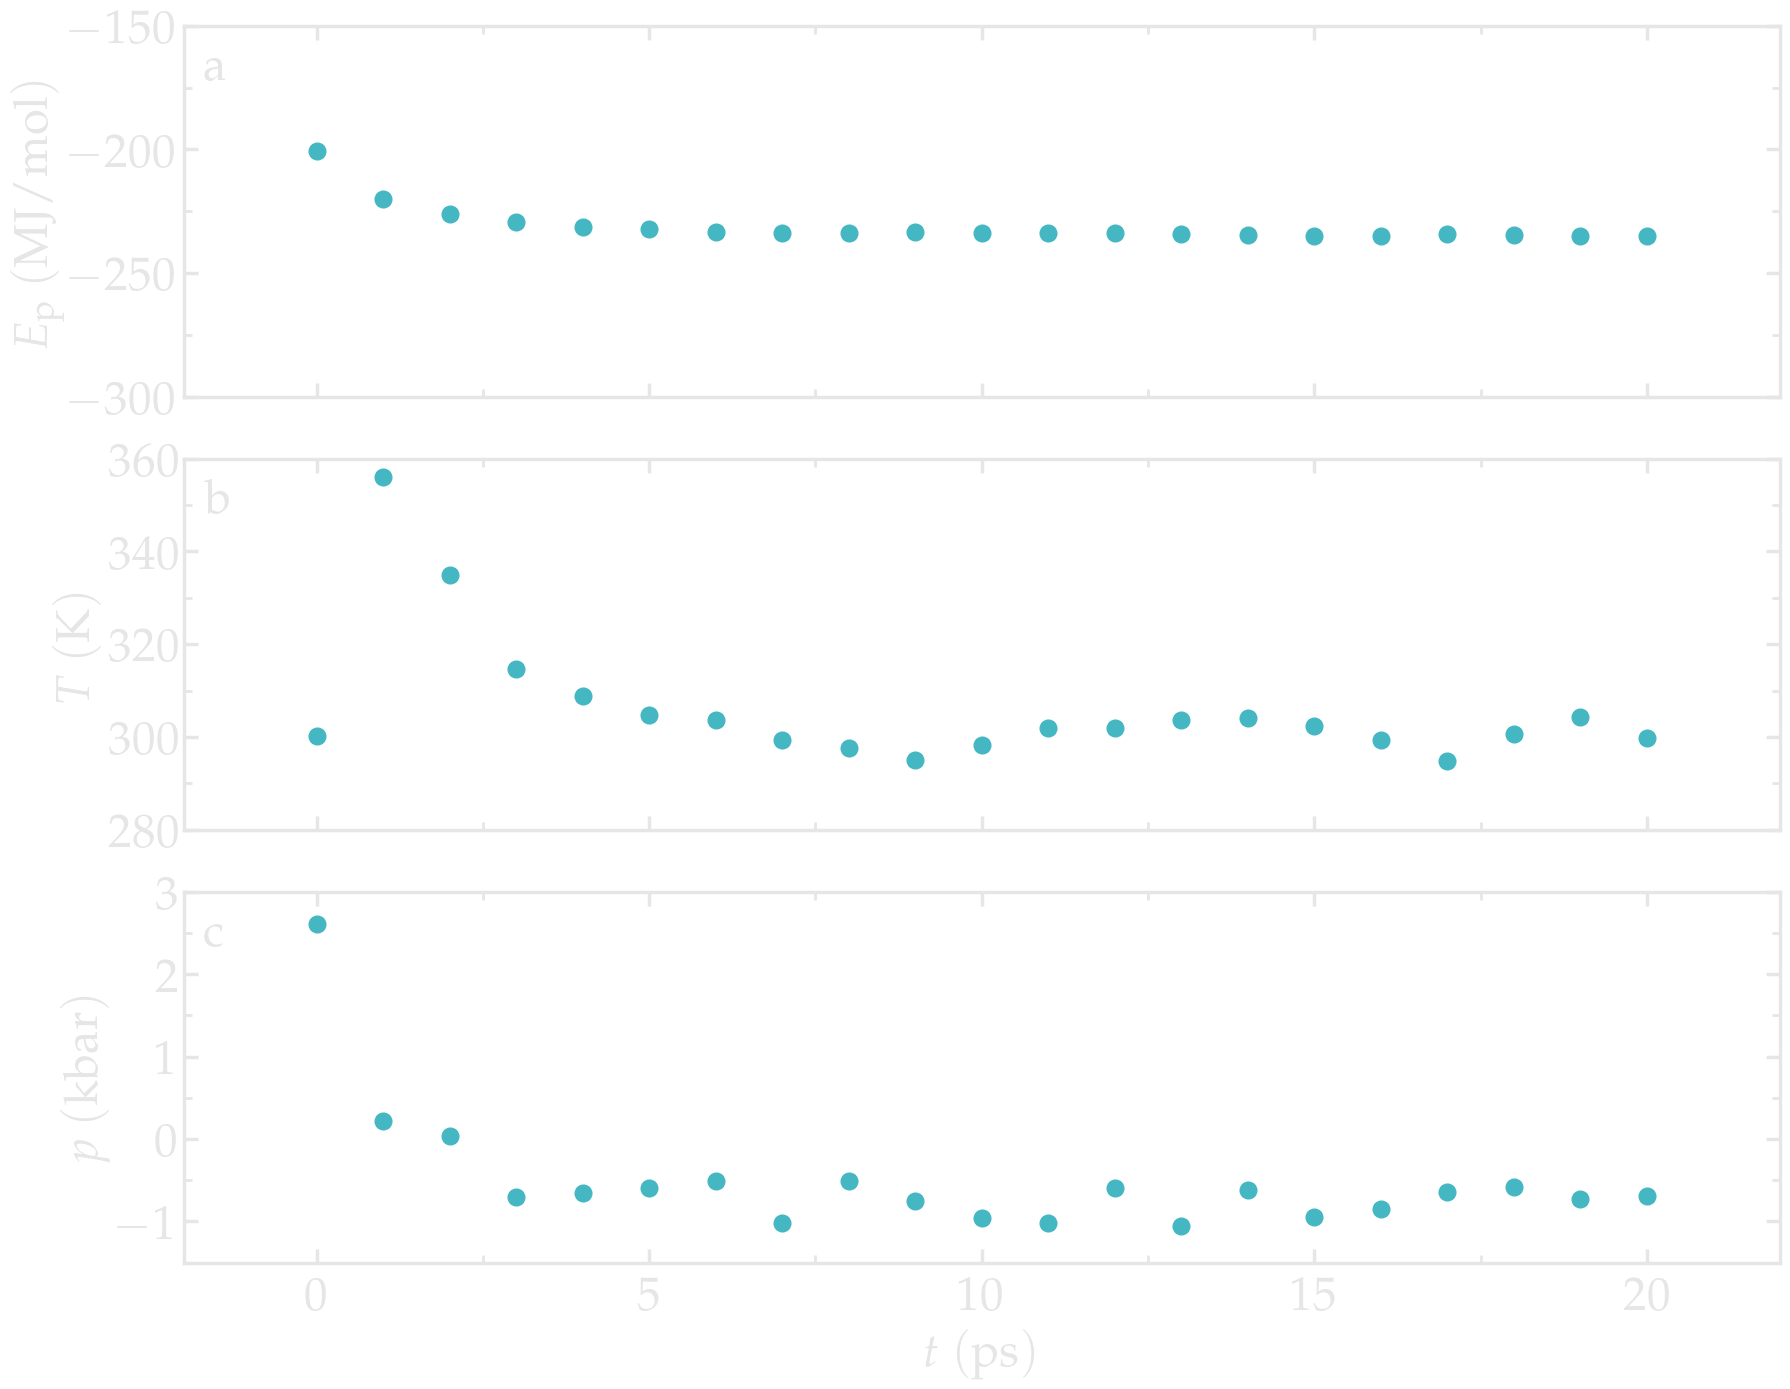

In [27]:
filename = "potential-energy-nvt"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = prepare_figure(mode, transparency = True, desired_figsize=(18,14))
    ax, n, l_tot, c_tot = [], 0, 3, 1

    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    t, energy = np.loadtxt("potential-energy-nvt.xvg", skiprows=24).T
    ax[-1].plot(t, energy/1000, "o", color=colors["mycyan"],
                markersize = 12, linewidth=4)
    complete_panel(ax[-1], None, r'$E_\mathrm{p} ~ \mathrm{(MJ/mol)}$',
                   legend=False, axis_color=mygray)
    set_boundaries(plt, x_ticks=np.arange(0, 22, 5), x_boundaries=(-2, 22),
                   y_boundaries=(-300, -150), y_ticks=np.arange(-300, -149, 50))
    
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    t, T = np.loadtxt("temperature-nvt.xvg", skiprows=24).T
    ax[-1].plot(t, T, "o", color=colors["mycyan"],
                markersize = 12, linewidth=4)
    complete_panel(ax[-1], None, r'$T ~ \mathrm{(K)}$',
                   legend=False, axis_color=mygray)
    set_boundaries(plt, x_ticks=np.arange(0, 22, 5), x_boundaries=(-2, 22),
                   y_boundaries=(280, 360), y_ticks=np.arange(280, 361, 20))
    
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    t, p = np.loadtxt("pressure-nvt.xvg", skiprows=24).T
    ax[-1].plot(t, p/1000, "o", color=colors["mycyan"],
                markersize = 12, linewidth=4)
    complete_panel(ax[-1], r'$t ~ \mathrm{(ps)}$', r'$p ~ \mathrm{(kbar)}$', xpad=10,
                   legend=False, axis_color=mygray)
    set_boundaries(plt, x_ticks=np.arange(0, 22, 5), x_boundaries=(-2, 22),
                   y_boundaries=(-1.500, 2.500), y_ticks=np.arange(-1.00, 3.501, 1.000))

    add_subplotlabels(fig, ax, [r"$\textrm{a}$", r"$\textrm{b}$", r"$\textrm{c}$"], color=mygray)
    save_figure(plt, fig, mode, git_path, path_figures, filename)